{}


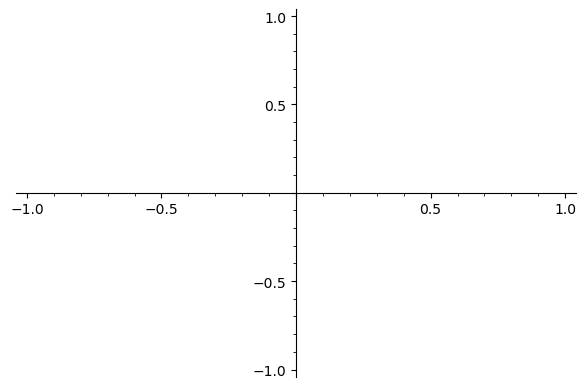

In [50]:
from sage.plot.point import Point
def weyl_alternation_set(lam, mu=(0,0,0)): #not for any specific lie algebra
    """
    Finds the Weyl alternation set for lam = mw_1 + nw_2 + kw_3
    and mu = c_1w_1 + c_2w_2 + c_3w+3
    """

    (m_, n_, k_) = lam
    (c1_, c2_, c3_) = mu

    alt_set = set()
    sigma_results_dict = get_sigma_results_dict(lam,mu)

    for s in W:
        if all( [ sigma_results_dict[s][j] >= 0 for j in range(0,3) ] ):
            alt_set.add(s)
    #print('alternation set')
    #print(alt_set)
    return alt_set


def weyl_alternation_set_18(lam, mu=(0,0,0)):#we are trying to have less W elements
    """
    Finds the Weyl alternation set for lam = mw_1 + nw_2 + kw_3
    and mu = c_1w_1 + c_2w_2 + c_3w+3
    """

    (m_, n_, k_) = lam
    (c1_, c2_, c3_) = mu

    alt_set = set()
    sigma_results_dict = get_sigma_results_dict(lam,mu)

    for s in W_18: 
        if all( [ sigma_results_dict[s][j] >= 0 for j in range(0,3) ] ):
            alt_set.add(s)
    #print('alternation set')
    #print(alt_set)
    return alt_set

'''DEFINITIONS'''

# Takes ambient space vector and converts to column matrix over SR
def ambient_to_list(v):
    return [v[i] for i in range(0,3)]

# Takes vector and converts to a list
def vector_to_list(v):
    return [v[i] for i in range(0,3)]


# Take R3 vector and gives coordinates in terms of alpha's
# v = c1 * a1 + c2 * a2 + c3 * a3
def ambient_to_alpha_coords(v):
    return root_matrix.solve_right(ambient_to_vector(v))

def vector_to_alpha_coords(v):
    return root_matrix.solve_right(v)

def ambient_to_vector(v):
    return matrix([v[i] for i in range(0,3)],ring=SR).transpose()


var('m n k c1 c2 c3') #updated weyl group to C_3
W = WeylGroup(['C', 3], prefix='s')
a = W.domain().simple_roots()
#print("simple roots")
#print(a)
P = W.domain().positive_roots()
#print("positive roots")
#print(P)
[s1, s2, s3] = W.simple_reflections()
e=s1*s1
W_18 = [e, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s1*s2*s3, s2*s3*s1, s2*s3*s2, s3*s2*s1, s3*s1*s2, s3*s2*s3, s3*s1*s2*s1, s3*s2*s3*s2] 


# Simple root vectors for the Lie algebra of type C_3
a1 = ambient_to_vector(a[1]); #print('a1'); print(a1)
a2 = ambient_to_vector(a[2]); #print('a1'); print(a2)
a3 = ambient_to_vector(a[3]); #print('a1'); print(a3)

root_matrix = matrix([ambient_to_list(a[i]) for i in range(1,4)],ring=SR).transpose()

# Fundamental weight vectors for the Lie algebra of type C_3
w1 = (1/2) * (2*a1 + 2*a2 + 1*a3)
w2 = (1*a1 + 2*a2 + 1*a3)
w3 = (1/2) * (2*a1 + 4*a2 + 3*a3)

lam = m*w1 + n*w2 + k*w3
mu = c1*w1 + c2*w2 + c3*w3
rho = ambient_to_vector((1/2)*sum(P))

''' OTHER FUNCTIONS WE NEED '''

def get_sigma_results_dict(lam, mu):
    # lam + mu = (m,n,k) + (c1,c2,c3) = (m,n,k,c1,c2,c3)
    #     ^ This is NOT vector addition! We're concatenating the tuples
    #       to pass into the callable.
    return dict(
    [ (s,[component(*(lam+mu)) for component in weyl_action_callable_dict[s]] ) for s in W
    ]
    )

def weyl_actions():
    """
    Returns a dict with key,value pairs: (s, (b_1, b_2, b_3)) where s is an
    element of the Weyl group and b_1, b_2, b_3 are the coefficients
    of a_1, a_2, and a_3, respectively, of s(lambda + rho) - (rho + mu)
    """
    return [(s,vector_to_alpha_coords(s.matrix() * (lam + rho) - (rho + mu))) for s in W]

weyl_action_callable_dict = dict([ (p[0],[fast_callable(p[1][i][0], vars=[m,n,k,c1,c2,c3]) for i in range(0,3)]) for p in weyl_actions()])



def get_alt_sets(num, muu=(0,0,0)):
    alt_sets = []
    alt_set_exp = []
    
    #for lam = (m,n,k)
    for m in range(num+1):
        for n in range(num+1):
            for k in range(num+1):
                alt_set = weyl_alternation_set(lam=(m,n,k), mu=muu)
                if alt_set not in alt_sets: #if a new set
                    alt_sets.append(alt_set) #record alt set
                    alt_set_exp.append((alt_set,(m,n,k),muu)) #record how we got it
                    print((alt_set,(m,n,k),muu))
    return alt_set_exp

def alt_sets_with_mus(lamnum, munum):
    alt_sets = []
    alt_set_exp = []
    
    #for lam = (m,n,k), mu=(x,y,z)
    for m in range(lamnum+1):
        for n in range(lamnum+1):
            for k in range(lamnum+1):
                for x in range(munum+1):
                    for y in range(munum+1):
                        for z in range(munum+1):
                            print((m,n,k),(x,y,z))
                            alt_set = weyl_alternation_set_18(lam=(m,n,k), mu=(x,y,z))
                            if alt_set == set():
                            elif alt_set == {s1*s1}:
                            if alt_set not in alt_sets: #if a new set
                                alt_sets.append(alt_set) #record alt set
                                alt_set_exp.append((alt_set,(m,n,k),(x,y,z))) #record how we got it
                                print((alt_set,(m,n,k),(x,y,z)))
    return alt_set_exp
    
def lam_mus_for_alt_set(lamnum, munum,desired_set):
    #alt_set = []
    alt_set_exp = []
    
    #for lam = (m,n,k), mu=(x,y,z)
    for m in range(lamnum+1):
        for n in range(lamnum+1):
            for k in range(lamnum+1):
                for x in range(munum+1):
                    for y in range(munum+1):
                        for z in range(munum+1):
                            print((m,n,k),(x,y,z))
                            alt_set = weyl_alternation_set_18(lam=(m,n,k), mu=(x,y,z))
                            if alt_set == desired_set: #if it gives us the right alt set
                                #alt_sets.append(alt_set) #record alt set
                                alt_set_exp.append(((m,n,k),(x,y,z))) #record how we got it
                                print((alt_set,(m,n,k),(x,y,z)))
    return alt_set_exp

def not_empty(lamnum, munum):
    #alt_set = []
    alt_set_exp = []
    
    #for lam = (m,n,k), mu=(x,y,z)
    for m in range(lamnum+1):
        for n in range(lamnum+1):
            for k in range(lamnum+1):
                for x in range(munum+1):
                    for y in range(munum+1):
                        for z in range(munum+1):
                            #print((m,n,k),(x,y,z))
                            alt_set = weyl_alternation_set_18(lam=(m,n,k), mu=(x,y,z))
                            if not alt_set == set(): #if it gives us the right alt set
                                #alt_sets.append(alt_set) #record alt set
                                alt_set_exp.append((alt_set,(m,n,k),(x,y,z))) #record how we got it
                                print((alt_set,(m,n,k),(x,y,z)))
    return alt_set_exp

def lam_for_alt_set(lamnum, muu, desired_set): #muu with two uu's to distinguish
    #alt_set = []
    alt_set_exp = []
    
    #for lam = (m,n,k), mu=(x,y,z)
    for m in range(lamnum+1):
        for n in range(lamnum+1):
            for k in range(lamnum+1):
                            alt_set = weyl_alternation_set_18(lam=(m,n,k), mu=muu)
                            if alt_set == desired_set: #if it gives us the right alt set
                                #alt_sets.append(alt_set) #record alt set
                                alt_set_exp.append((m,n,k)) #record how we got it
                                #print((alt_set,(m,n,k),(x,y,z)))
    return alt_set_exp

color_key = [(1,0,0), (1,0.125,0), (1,0.25,0), (1,0.375,0), (1,0.5,0), (1,0.625,0), (1,0.75,0), (1,0.875,0), (1,1,0), (0.875,1,0), (0.75,1,0), (0.625,1,0), (0.5,1,0), (0.375,1,0), (0.25,1,0), (0.125,1,0), (0,1,0), (0,1,0.125),(0,1,0.25),(0,1,0.375),(0,1,0.5),(0,1,0.625),(0,1,0.75), (0,1,0.875),(0,1,1), (0,0.875,1), (0,0.75,1),(0,0.625,1),(0,0.5,1),(0,0.375,1),(0,0.25,1),(0,0.125,1),(0,0,1),(0.125,0,1),(0.25,0,1),(0.375,0,1),(0.5,0,1),(0.625,0,1),(0.75,0,1),(0.875,0,1),(1,0,1),(1,0,0.875),(1,0,0.75),(1,0,0.625),(1,0,0.5),(1,0,0.375),(1,0,0.25),(1,0,0.125)]
set_key = [{}, {s1*s1}, {s1*s1, s1}, {s1*s1, s2}, {s1*s1, s3}, {s1*s1, s1, s2}, {s1*s1, s2, s3}, {s1*s1, s1, s2, s2*s1}, {s1*s1, s1, s3, s3*s1}, {s1*s1, s2, s3, s2*s3}, {s1*s1, s2, s3, s3*s2}, {s1*s1, s1, s2, s3, s3*s1}, {s1*s1, s2, s3, s2*s3, s3*s2}, {s1*s1, s1, s2, s3, s2*s1, s3*s1}, {s1*s1, s1, s2, s3, s2*s3, s3*s1}, {s1*s1, s1, s2, s3, s3*s1, s3*s2}, {s1*s1, s1, s2, s1*s2, s2*s1, s1*s2*s1}, {s1*s1, s2, s3, s2*s3, s3*s2, s2*s3*s2}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1}, {s1*s1, s1, s2, s3, s2*s1, s3*s1, s3*s2}, {s1*s1, s1, s2, s3, s2*s3, s3*s1, s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s3*s1, s1*s2*s1}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s3*s2}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s2*s3*s1}, {s1*s1, s1, s2, s3, s2*s3, s3*s1, s3*s2, s2*s3*s2}, {s1*s1, s2, s3, s2*s3, s3*s2, s2*s3*s2, s3*s2*s3, s3*s2*s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s1*s2*s1}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s3*s2, s2*s3*s1}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s3*s2, s2*s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s1*s2*s1, s2*s3*s1}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s3*s1, s3*s2, s1*s2*s1, s3*s1*s2}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s3*s2, s2*s3*s1, s2*s3*s2}, {s1*s1, s1, s2, s3, s2*s3, s3*s1, s3*s2, s2*s3*s2, s3*s2*s3, s3*s2*s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s3*s1*s2}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s3*s2, s2*s3*s2, s3*s2*s3, s3*s2*s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s1, s3*s1*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s2, s3*s1*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s3*s1*s2, s3*s2*s1, s3*s1*s2*s1}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s3*s1, s3*s2, s1*s2*s1, s3*s1*s2, s3*s2*s1, s3*s1*s2*s1}, {s1*s1, s1, s2, s3, s2*s1, s2*s3, s3*s1, s3*s2, s2*s3*s1, s2*s3*s2, s3*s2*s3, s3*s2*s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s1, s2*s3*s2, s3*s1*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s1, s3*s1*s2, s3*s2*s1, s3*s1*s2*s1}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s2, s3*s1*s2, s3*s2*s1, s3*s1*s2*s1}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s2, s3*s1*s2, s3*s2*s3, s3*s2*s3*s2}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s1, s2*s3*s2, s3*s1*s2, s3*s2*s1, s3*s1*s2*s1}, {s1*s1, s1, s2, s3, s1*s2, s2*s1, s2*s3, s3*s1, s3*s2, s1*s2*s1, s2*s3*s1, s2*s3*s2, s3*s1*s2, s3*s2*s3, s3*s2*s3*s2}]
#print(type(color_key[1]))

def plot_alt_set_lam(lamnum, mu, desired_set):
    print(desired_set)
    show(points(lam_for_alt_set(lamnum=lamnum,muu=mu,desired_set=desired_set), rgbcolor=color_key[set_key.index(desired_set)], size=50))
#(0.2,0.6, 0.1)

def plot_lam_mu_for_alt_set(lamnum, munum, desired_set):
    points = lam_mus_for_alt_set(lamnum=lamnum, munum=munum, desired_set=desired_set)
    
    show(sum([arrow(point[0],point[1],color='green', width=0.5, arrowsize=0) for point in points]))

def print_legend():
    F = Graphics()
    for i in range(len(set_key)):
        F+= points((0,i), rgbcolor=color_key[i], legend_label=set_key[i], size = 50)
    F.show()

def all_sets(lamnum,mu):
    #alt_sets = []
    colors = []
    all_points = []
    
    #for lam = (m,n,k)
    for m in range(lamnum+1):
        for n in range(lamnum+1):
            for k in range(lamnum+1):
                print((m,n,k))
                alt_set = weyl_alternation_set(lam=(m,n,k), mu=mu)
                all_points.append((m,n,k))
                colors.append(set_key.index(alt_set))
                #print(color_key[set_key.index(alt_set)])
    return all_points, colors

def plot_all_points(lamnum,mu):
    points_and_colors = all_sets(lamnum=lamnum, mu=mu)
    
    #separate points_and_colors into the points list and the colors list
    colors = points_and_colors[1]
    all_points = points_and_colors[0]
    
    G = Graphics()
    for i in range(len(all_points)):
        G += points(all_points[i], rgbcolor = color_key[colors[i]], size=100)
    
    G.show()
    
    #[point(points_and_colors[0][i], rgbcolor=color_key[colors[i]]) for i in range(len(points_and_colors))]
    #points_and_colors[0]
    #print(all_points)
    #print(colors)
    #show(sum(all_points))
    #show(points(all_points, rgbcolor=color_key[colors[1]], pointsize=100))
    #show(sum([point(all_points[i], rgbcolor=color_key[colors[i]], pointsize=100) for i in range(len(points_and_colors))]))

#gives alternation set for a lambda and a mu
#weyl_alternation_set(lam=(2,1,0), mu=(0,0,0))

#gives all alternation sets for lambdas up to num and mu=muu
#print(get_alt_sets(num=10,muu=(0,0,0))) #the 2 u's are on purpose to distinguish variables
#get_alt_sets(num=100,muu=(0,0,0))

#gives all alt sets for lam going up to lamnum and mu going up to munum
#alt_sets_with_mus(lamnum=0,munum=50)

#gives all lam and mu that give desired_set as alternation set. lam goes up to lamnum, mu goes up to munum
#lam_mus_for_alt_set(lamnum=5, munum=5,desired_set={s1*s1}) 

#gives all alt sets that are not the empty set for lam up to lamnum and mu up to munum
#not_empty(lamnum=10, munum=10)

#gives all lambda that with mu=muu get alternation set= desired_set
#print(lam_for_alt_set(lamnum=10, muu=(0,0,0), desired_set={s1*s1}))

#plots all lambda that with mu=mu give alt set = desired_set
plot_alt_set_lam(lamnum=10, mu=(0,0,0), desired_set={})

#plots line between lam and mu that give alt set=desired_set
#plot_lam_mu_for_alt_set(lamnum=10, munum=10, desired_set={s1*s1,s1,s2,s3,s1*s2,s2*s1,s2*s3,s3*s1,s3*s2,s1*s2*s1,s2*s3*s1,s2*s3*s2,s3*s1*s2,s3*s2*s3,s3*s2*s3*s2})

#plots all lambda points up to lamnum with a different color for each alt set (mu is fixed)
#plot_all_points(lamnum=10,mu=(0,0,0))
#print_legend() #prints plot legend